In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
yellow_19_train = pd.read_csv('2019_Yellow_Taxi_Trip_Data_training.csv', nrows=100000)
yellow_19_test = pd.read_csv('2019_Yellow_Taxi_Trip_Data_test.csv', nrows=100000)

In [8]:
yellow_19_train = yellow_19_train[yellow_19_train['tpep_pickup_datetime'].notna()]
yellow_19_train = yellow_19_train[yellow_19_train['tpep_dropoff_datetime'].notna()]
yellow_19_train['tpep_pickup_datetime'] = pd.to_datetime(yellow_19_train['tpep_pickup_datetime'], errors='coerce')
yellow_19_train['tpep_dropoff_datetime'] = pd.to_datetime(yellow_19_train['tpep_dropoff_datetime'], errors='coerce')
yellow_19_train['trip_seconds'] = (yellow_19_train['tpep_dropoff_datetime'] - yellow_19_train['tpep_pickup_datetime']).dt.total_seconds()
yellow_19_train['month'] = yellow_19_train['tpep_dropoff_datetime'].dt.month
yellow_19_train = yellow_19_train[yellow_19_train['trip_distance'].notna()]
yellow_19_train = yellow_19_train[yellow_19_train['total_amount'].notna()]            
x = yellow_19_train[['trip_distance', 'trip_seconds', 'month']]
y = yellow_19_train['total_amount']

In [11]:
yellow_19_test = yellow_19_test[yellow_19_test['tpep_pickup_datetime'].notna()]
yellow_19_test = yellow_19_test[yellow_19_test['tpep_dropoff_datetime'].notna()]
yellow_19_test['tpep_pickup_datetime'] = pd.to_datetime(yellow_19_test['tpep_pickup_datetime'], errors='coerce')
yellow_19_test['tpep_dropoff_datetime'] = pd.to_datetime(yellow_19_test['tpep_dropoff_datetime'], errors='coerce')
yellow_19_test['trip_seconds'] = (yellow_19_test['tpep_dropoff_datetime'] - yellow_19_test['tpep_pickup_datetime']).dt.total_seconds()
yellow_19_test['month'] = yellow_19_test['tpep_dropoff_datetime'].dt.month
yellow_19_test = yellow_19_test[yellow_19_test['trip_distance'].notna()]
yellow_19_test = yellow_19_test[yellow_19_test['total_amount'].notna()]            
x_test = yellow_19_test[['trip_distance', 'trip_seconds', 'month']]
y_test = yellow_19_test['total_amount']

<h2> Hidden Layer, MSE, 32 Input, 64 Hidden </h2>

In [9]:
NN_model = Sequential()

NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x, y, epochs=100,verbose=2,validation_split=0.2)

Epoch 1/100
2500/2500 - 4s - loss: 331.6576 - mae: 9.9501 - mse: 331.6576 - val_loss: 73.0965 - val_mae: 3.7468 - val_mse: 73.0965
Epoch 2/100
2500/2500 - 3s - loss: 56.7338 - mae: 3.2425 - mse: 56.7338 - val_loss: 66.0490 - val_mae: 3.1031 - val_mse: 66.0490
Epoch 3/100
2500/2500 - 3s - loss: 49.3261 - mae: 2.8803 - mse: 49.3261 - val_loss: 67.7367 - val_mae: 3.2823 - val_mse: 67.7367
Epoch 4/100
2500/2500 - 3s - loss: 52.0131 - mae: 2.9461 - mse: 52.0131 - val_loss: 59.0130 - val_mae: 2.8852 - val_mse: 59.0130
Epoch 5/100
2500/2500 - 3s - loss: 44.5187 - mae: 2.6847 - mse: 44.5187 - val_loss: 58.3128 - val_mae: 2.9059 - val_mse: 58.3128
Epoch 6/100
2500/2500 - 3s - loss: 45.5625 - mae: 2.7054 - mse: 45.5625 - val_loss: 56.9585 - val_mae: 2.9186 - val_mse: 56.9585
Epoch 7/100
2500/2500 - 3s - loss: 43.5058 - mae: 2.6377 - mse: 43.5058 - val_loss: 56.1863 - val_mae: 2.8011 - val_mse: 56.1863
Epoch 8/100
2500/2500 - 3s - loss: 46.4740 - mae: 2.7378 - mse: 46.4740 - val_loss: 57.6428 - v

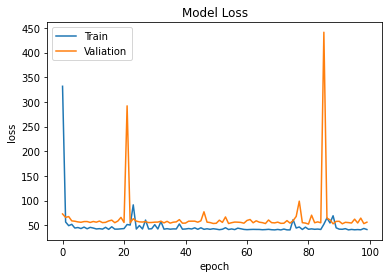

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

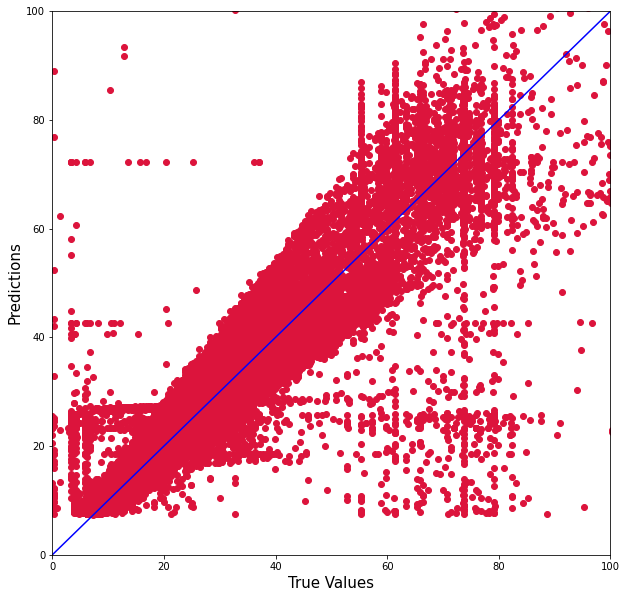

In [12]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [13]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 756us/step - loss: 39.8022 - mae: 2.5712 - mse: 39.8022


[39.80215072631836, 2.5712130069732666, 39.80215072631836]

<h2> 2 Hidden Layers, MSE, 32 Input, 64 Hidden </h2>

In [15]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 328.9722 - mae: 9.1747 - mse: 328.9722 - val_loss: 62.1075 - val_mae: 2.9400 - val_mse: 62.1075
Epoch 2/100
2500/2500 - 3s - loss: 95.2188 - mae: 3.1749 - mse: 95.2188 - val_loss: 70.5371 - val_mae: 3.6448 - val_mse: 70.5371
Epoch 3/100
2500/2500 - 3s - loss: 51.4218 - mae: 2.9767 - mse: 51.4218 - val_loss: 59.3937 - val_mae: 3.0758 - val_mse: 59.3937
Epoch 4/100
2500/2500 - 3s - loss: 57.2291 - mae: 2.9654 - mse: 57.2291 - val_loss: 57.5741 - val_mae: 2.9517 - val_mse: 57.5741
Epoch 5/100
2500/2500 - 3s - loss: 114.1901 - mae: 3.9087 - mse: 114.1901 - val_loss: 63.1948 - val_mae: 3.3459 - val_mse: 63.1948
Epoch 6/100
2500/2500 - 3s - loss: 47.5201 - mae: 2.7615 - mse: 47.5201 - val_loss: 57.5322 - val_mae: 2.9719 - val_mse: 57.5322
Epoch 7/100
2500/2500 - 3s - loss: 44.9449 - mae: 2.7192 - mse: 44.9449 - val_loss: 58.3659 - val_mae: 3.0503 - val_mse: 58.3659
Epoch 8/100
2500/2500 - 3s - loss: 53.1787 - mae: 2.8923 - mse: 53.1787 - val_loss: 56.0640 -

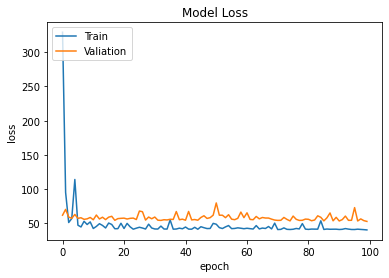

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [17]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 789us/step - loss: 39.4167 - mae: 2.4510 - mse: 39.4167 2s -


[39.416717529296875, 2.451005697250366, 39.416717529296875]

<h1> 3 Hidden Layers, MSE, 32 Input, 64 Hidden

In [18]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer 
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 509.5005 - mae: 10.6359 - mse: 509.5005 - val_loss: 62.6273 - val_mae: 2.7804 - val_mse: 62.6273
Epoch 2/100
2500/2500 - 4s - loss: 46.4131 - mae: 2.7375 - mse: 46.4131 - val_loss: 61.3834 - val_mae: 3.1133 - val_mse: 61.3834
Epoch 3/100
2500/2500 - 4s - loss: 51.7744 - mae: 2.9633 - mse: 51.7744 - val_loss: 57.4327 - val_mae: 2.9464 - val_mse: 57.4327
Epoch 4/100
2500/2500 - 4s - loss: 98.8446 - mae: 3.7963 - mse: 98.8446 - val_loss: 58.1757 - val_mae: 2.9669 - val_mse: 58.1757
Epoch 5/100
2500/2500 - 4s - loss: 47.1390 - mae: 2.8238 - mse: 47.1390 - val_loss: 58.9296 - val_mae: 3.0406 - val_mse: 58.9296
Epoch 6/100
2500/2500 - 4s - loss: 83.8319 - mae: 3.8373 - mse: 83.8319 - val_loss: 56.5489 - val_mae: 2.7930 - val_mse: 56.5489
Epoch 7/100
2500/2500 - 4s - loss: 42.5573 - mae: 2.6132 - mse: 42.5573 - val_loss: 56.3691 - val_mae: 2.9140 - val_mse: 56.3691
Epoch 8/100
2500/2500 - 4s - loss: 45.9143 - mae: 2.7559 - mse: 45.9143 - val_loss: 56.1213 - 

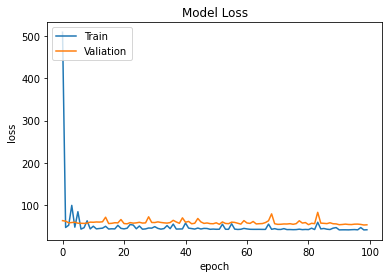

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [20]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 3s 816us/step - loss: 39.1553 - mae: 2.4939 - mse: 39.1553


[39.15525817871094, 2.493945360183716, 39.15525817871094]

<h2> 1 Hidden Layer, MAE, 32 Input, 64 Hidden

In [21]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))# The Input Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 3s - loss: 4.9340 - mae: 4.9340 - mse: 1387.8314 - val_loss: 3.8264 - val_mae: 3.8264 - val_mse: 444.9370
Epoch 2/100
2500/2500 - 3s - loss: 3.0412 - mae: 3.0412 - mse: 156.6577 - val_loss: 3.4777 - val_mae: 3.4777 - val_mse: 145.1291
Epoch 3/100
2500/2500 - 3s - loss: 2.8356 - mae: 2.8356 - mse: 96.2618 - val_loss: 3.3917 - val_mae: 3.3917 - val_mse: 123.2580
Epoch 4/100
2500/2500 - 3s - loss: 2.8065 - mae: 2.8065 - mse: 93.7116 - val_loss: 3.1747 - val_mae: 3.1747 - val_mse: 128.9020
Epoch 5/100
2500/2500 - 3s - loss: 2.7216 - mae: 2.7216 - mse: 75.0830 - val_loss: 3.1860 - val_mae: 3.1860 - val_mse: 133.7263
Epoch 6/100
2500/2500 - 3s - loss: 2.6903 - mae: 2.6903 - mse: 75.5281 - val_loss: 3.4001 - val_mae: 3.4001 - val_mse: 189.7446
Epoch 7/100
2500/2500 - 3s - loss: 2.6519 - mae: 2.6519 - mse: 73.2303 - val_loss: 2.9504 - val_mae: 2.9504 - val_mse: 67.9583
Epoch 8/100
2500/2500 - 3s - loss: 2.5858 - mae: 2.5858 - mse: 61.2767 - val_loss: 2.7853 - val_mae: 2

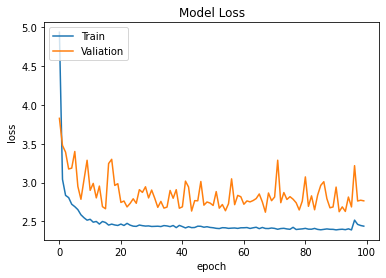

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [23]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 766us/step - loss: 2.4179 - mae: 2.4179 - mse: 43.0004


[2.41787052154541, 2.41787052154541, 43.00038528442383]

<h2> 2 Hidden Layers, MAE, 32 Input, 64 Hidden

In [ ]:
NN_model = Sequential()

NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


Epoch 1/100
2500/2500 - 4s - loss: 4.5064 - mae: 4.5064 - mse: 1052.0068 - val_loss: 2.7513 - val_mae: 2.7513 - val_mse: 63.1093
Epoch 2/100
2500/2500 - 3s - loss: 2.8017 - mae: 2.8017 - mse: 77.9191 - val_loss: 2.7855 - val_mae: 2.7855 - val_mse: 63.4616
Epoch 3/100
2500/2500 - 3s - loss: 2.7263 - mae: 2.7263 - mse: 74.1264 - val_loss: 2.8526 - val_mae: 2.8526 - val_mse: 64.6747
Epoch 4/100
2500/2500 - 3s - loss: 2.6554 - mae: 2.6554 - mse: 61.7782 - val_loss: 2.8526 - val_mae: 2.8526 - val_mse: 70.4392
Epoch 5/100
2500/2500 - 3s - loss: 2.6872 - mae: 2.6872 - mse: 98.0348 - val_loss: 2.7430 - val_mae: 2.7430 - val_mse: 63.1694
Epoch 6/100
2500/2500 - 3s - loss: 2.5643 - mae: 2.5643 - mse: 55.3754 - val_loss: 2.7727 - val_mae: 2.7727 - val_mse: 65.4099
Epoch 7/100
2500/2500 - 3s - loss: 2.5229 - mae: 2.5229 - mse: 48.7015 - val_loss: 2.9716 - val_mae: 2.9716 - val_mse: 66.9220
Epoch 8/100
2500/2500 - 3s - loss: 2.6259 - mae: 2.6259 - mse: 77.5722 - val_loss: 2.7351 - val_mae: 2.7351 -

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [ ]:
NN_model.evaluate(x_test, y_test)

<h2> 3 Hidden Layers, MAE, 32 Input, 64 Hidden

In [ ]:
NN_model = Sequential()

NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer 
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [ ]:
NN_model.evaluate(x_test, y_test)

<h2> 1 Hidden Layer, MSE, 16 Input, 32 Hidden

In [ ]:
NN_model = Sequential()

NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

history = NN_model.fit(x, y, epochs=100, verbose=2, validation_split=0.2)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [ ]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [ ]:
NN_model.evaluate(x_test, y_test)

<h2> 2 Hidden Layers, MSE, 16 Input, 32 Hidden

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer 
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x,y,epochs=100,verbose=2,validation_split=0.2)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [ ]:
NN_model.evaluate(x_test, y_test)

<h2> 3 Hidden Layers, MSE, 16 Input, 32 Hidden

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer

# The Hidden Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x,y,epochs=100,verbose=2,validation_split=0.2)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [ ]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [ ]:
NN_model.evaluate(x_test, y_test)

<h2> 1 Hidden Layers, MAE, 16 Input, 32 Hidden

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu')) # The Input Layer
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu')) # The Hidden Layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear')) # The Output Layer
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])
history = NN_model.fit(x,y,epochs=100,verbose=2,validation_split=0.2)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [ ]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [ ]:
NN_model.evaluate(x_test, y_test)